<a href="https://colab.research.google.com/github/sksaket/Association-Rules/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
movies=pd.read_csv('/content/my_movies.csv')
movies=movies.iloc[:,5:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


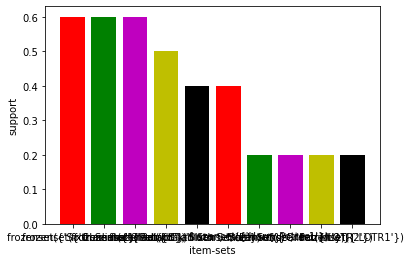

In [12]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

# To eliminate Redudancy in Rules 

In [13]:
def to_list(i):
    return (sorted(list(i)))

In [14]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [15]:
ma_X = ma_X.apply(sorted)

In [16]:
rules_sets = list(ma_X)

In [17]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [18]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [19]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [20]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
60,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
118,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
86,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
48,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
32,"(Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
